In [1]:
import numpy as np
# import skimage.data as skd
from skimage import io
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [2]:
def compute_error(original, compressed, rows, cols):
    # compressed = np.clip(compressed.astype('uint8'), 0, 255)
    # #Reshape the image to original dimension
    original = original.reshape(rows, cols, -1)
    compressed = compressed.reshape(rows, cols, -1)

    channels = compressed.shape[-1]

    # Compute PSNR
    psnr_val = psnr(original, compressed)
    print("PSNR:", psnr_val)

    # Compute SSIM
    ssim_val = ssim(original, compressed, channel_axis=2)
    print("SSIM:", ssim_val)

    fig, axs = plt.subplots(1, 2)

    axs[0].axis('off')
    axs[0].set_title('Ground truth')
    if channels > 1:
        axs[0].imshow(original)
    else:
        axs[0].imshow(original, cmap='gray', vmin=0, vmax=255)

    axs[1].axis('off')
    axs[1].set_title('Test image')
    if channels > 1:
        axs[1].imshow(compressed)
    else:
        axs[1].imshow(compressed, cmap='gray', vmin=0, vmax=255)
    
    plt.show()



#### CAMERA ####

### Float ###
PSNR: inf
SSIM: 1.0


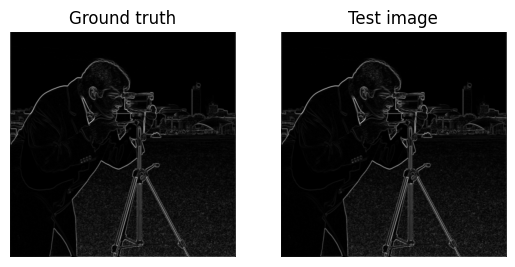


### Posit ###
PSNR: inf
SSIM: 1.0


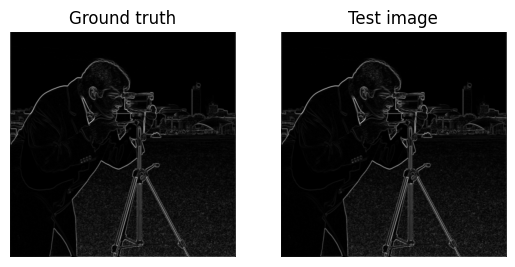


### Log Approx Posit ###
PSNR: 51.043923437775256
SSIM: 0.999093630815087


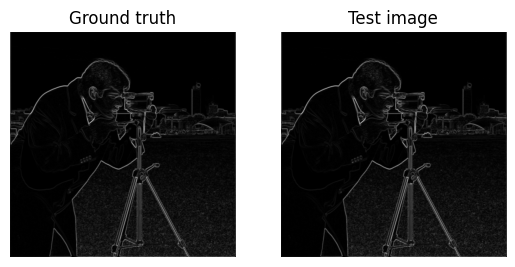


### ANOTHER Log Approx Posit ###
PSNR: 51.043923437775256
SSIM: 0.999093630815087


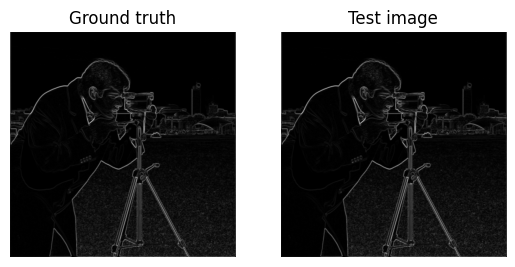



#### LENNA ####

### Float ###
PSNR: 30.301681240378006
SSIM: 0.8271234003101919


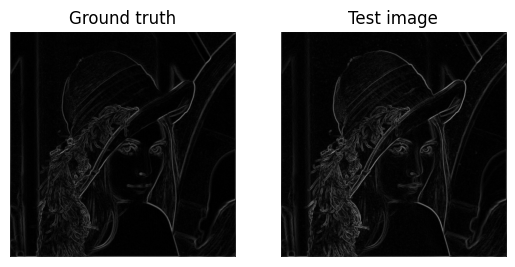


### Posit ###
PSNR: 30.30167687067504
SSIM: 0.8271233763830553


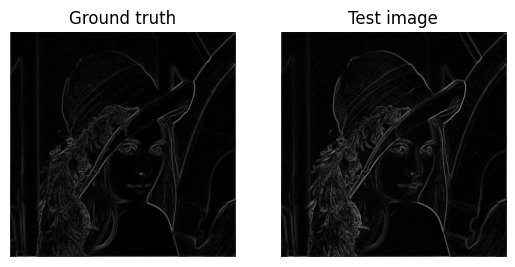


### Log Approx Posit ###
PSNR: 29.79824017672656
SSIM: 0.8136098667443253


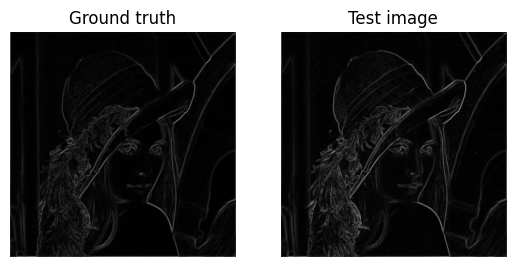


### ANOTHER Log Approx Posit ###
PSNR: 44.54273221331752
SSIM: 0.9962917360944917


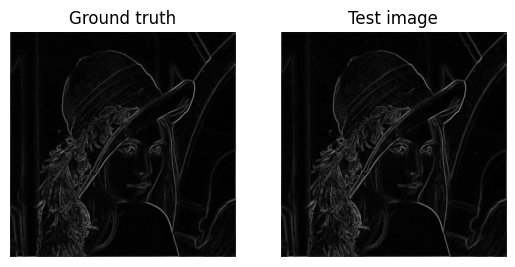



#### PEPPERS ####

### Float ###
PSNR: 27.114835904761282
SSIM: 0.7466877717157486


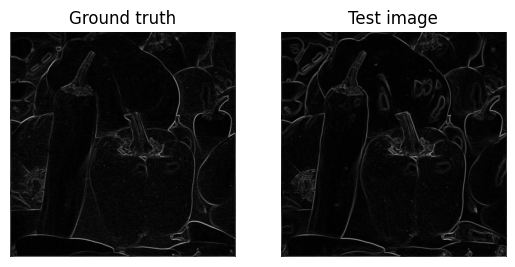


### Posit ###
PSNR: 27.114835904761282
SSIM: 0.7466877717157486


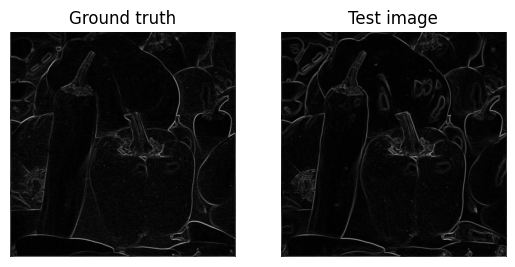


### Log Approx Posit ###
PSNR: 27.048516281325735
SSIM: 0.7479693539909283


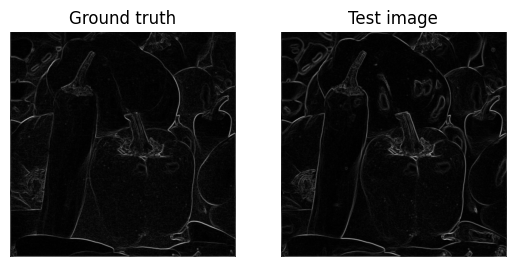


### ANOTHER Log Approx Posit ###
PSNR: 45.6212116700582
SSIM: 0.996299915955


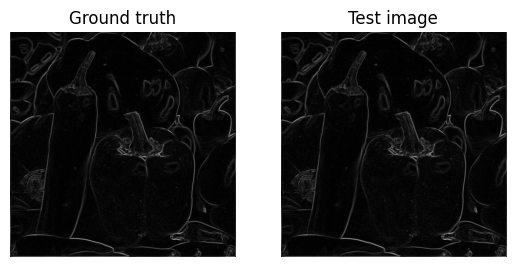



#### BABOON ####

### Float ###
PSNR: 23.971422471487607
SSIM: 0.7006494159076618


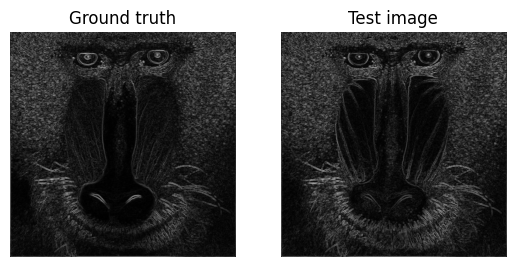


### Posit ###
PSNR: 23.97142189928642
SSIM: 0.7006491737618035


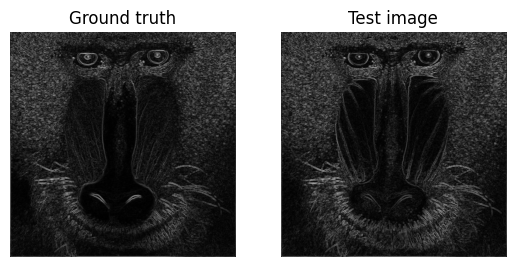


### Log Approx Posit ###
PSNR: 23.237056310556326
SSIM: 0.6885124785576501


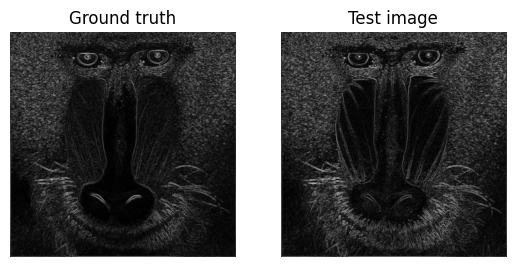


### ANOTHER Log Approx Posit ###
PSNR: 38.26949200605058
SSIM: 0.9950362835825276


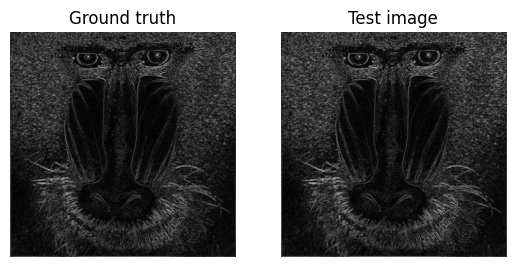

In [4]:
def compare_err(pic):
    print('\n\n#### '+pic.upper()+' ####')

    img = io.imread('imgs/'+pic+'_edges_golden.png')
    rows, cols = img.shape[:2]

    # float
    print('\n### Float ###')
    edges = io.imread('imgs/'+pic+'_edges.png')
    compute_error(img, edges, rows, cols)

    # posit
    print('\n### Posit ###')
    edges = io.imread('imgs/'+pic+'_edges_posit.png')
    compute_error(img, edges, rows, cols)

    # log approx posit
    print('\n### Log Approx Posit ###')
    edges = io.imread('imgs/'+pic+'_edges_approx.png')
    compute_error(img, edges, rows, cols)

    # ANOTHER log approx posit
    print('\n### ANOTHER Log Approx Posit ###')
    edges_exact = io.imread('imgs/'+pic+'_edges_posit.png')
    edges_approx = io.imread('imgs/'+pic+'_edges_approx.png')
    compute_error(edges_exact, edges_approx, rows, cols)

for pic in ['camera','lenna','peppers','baboon']:
    compare_err(pic)